# ニューラルネットワークの学習

このページでは、ニューラルネットワークの学習を行っています。

## 注意事項

- 「Googleへのログインが必要」と出たら、自分のGoogleアカウントでログインします。

- 「警告: このノートブックは Google が作成したものではありません。」と出たら「このまま実行」をクリックします。

Accuracy: 90.33%


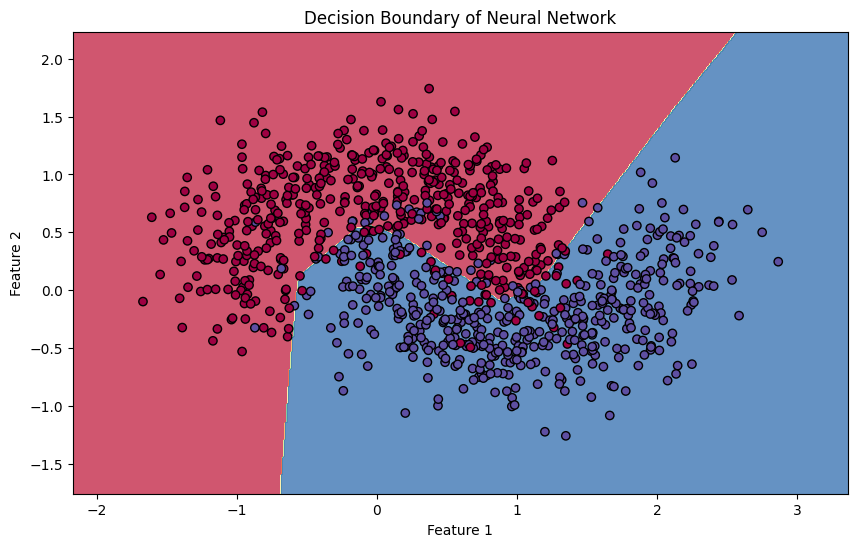

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# 1. データの作成
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. モデルの構築
model = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=500, random_state=42)

# 3. 学習
model.fit(X_train, y_train)

# 4. テストデータでの予測
y_pred = model.predict(X_test)

# 5. 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 6. プロット
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Spectral)
plt.title("Decision Boundary of Neural Network")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
